In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from joblib import dump,load

In [2]:
Combined_Data = pd.read_csv("../Resources/Combined_Data.csv")
df = pd.read_csv("../Resources/Combined_Data.csv")

df_2024 = pd.read_csv("../Resources/Cleaned_2024.csv")

Combined_Data.drop('Tm', axis=1, inplace=True)

df_2024.drop("Unnamed: 0", axis=1, inplace=True)
df_2024 = df_2024.drop([30, 31])

In [3]:
corr_data = Combined_Data.corr()['playoffs']

low_corr_df = pd.DataFrame(corr_data.loc[(corr_data <= 0.1) & (corr_data >= -0.1)])
low_corr_df.rename(columns={'playoffs': 'correlation'}, inplace=True)

index_values = low_corr_df.index.tolist()[:-1]

index_values

['BK', 'CG_y', 'Ch', 'GF', 'SB', 'cSho']

In [4]:
columns_to_keep = index_values + ['playoffs']

focused_df = Combined_Data[columns_to_keep]
df_2024_focused = Combined_Data[columns_to_keep]

focused_df

,BK,CG_y,Ch,GF,SB,cSho,playoffs
0,5.0,2.0,6150.0,160.0,79.0,1.0,0
1,8.0,2.0,5889.0,160.0,90.0,1.0,1
2,8.0,2.0,5934.0,160.0,81.0,0.0,0
3,3.0,2.0,5819.0,160.0,125.0,0.0,1
4,3.0,1.0,6208.0,162.0,66.0,0.0,1
...,...,...,...,...,...,...,...
145,7.0,0.0,5944.0,162.0,101.0,0.0,0
146,1.0,0.0,5802.0,162.0,160.0,0.0,1
147,4.0,3.0,5789.0,159.0,79.0,1.0,1
148,12.0,1.0,5733.0,161.0,99.0,1.0,1


In [5]:
y = focused_df["playoffs"]
X = focused_df.drop(columns="playoffs")

In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
#                                                     random_state=1, 
                                                    stratify=y)
X_train.shape

(112, 6)

In [7]:
classifier = LogisticRegression(solver='liblinear',
                                max_iter=1000,
                                # random_state=1
                               )
classifier

LogisticRegression(max_iter=1000, solver='liblinear')

In [8]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [9]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6428571428571429
Testing Data Score: 0.6052631578947368


In [10]:
dump(classifier, 'log_model.joblib')

['log_model.joblib']

In [11]:
model = load('log_model.joblib')

In [12]:
predictions_2024 = model.predict(df_2024[index_values])
predictions_2024

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
df_2024['predictions'] = predictions_2024
predicted_2024 = df_2024[["Tm", "predictions"]]

predicted_2024

,Tm,predictions
0,Arizona Diamondbacks,0
1,Atlanta Braves,0
2,Baltimore Orioles,0
3,Boston Red Sox,0
4,Chicago Cubs,0
5,Chicago White Sox,0
6,Cincinnati Reds,0
7,Cleveland Guardians,0
8,Colorado Rockies,0
9,Detroit Tigers,0


In [14]:
# Make list for all the predictions
predictions = {}

# Create loop for it to run 100 times with the model
iterations = 100
for i in range(iterations):
    y = focused_df["playoffs"]
    X = focused_df.drop(columns="playoffs")
    X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)
    classifier = LogisticRegression(solver='liblinear', max_iter=1000)
    classifier.fit(X_train, y_train)
    dump(classifier, 'log_model.joblib')
    model = load('log_model.joblib')
    predictions_2024 = model.predict(df_2024[index_values])
    predictions_df = pd.DataFrame({"Team": df_2024["Tm"], "Prediction": predictions_2024})
    counts = predictions_df.groupby('Team')['Prediction'].sum().astype(int)
    
    for team, count in counts.items():
        if team in predictions:
            predictions[team] += count
        else:
            predictions[team] = count

predictions

{'Arizona Diamondbacks': 0,
 'Atlanta Braves': 2,
 'Baltimore Orioles': 0,
 'Boston Red Sox': 30,
 'Chicago Cubs': 3,
 'Chicago White Sox': 10,
 'Cincinnati Reds': 72,
 'Cleveland Guardians': 5,
 'Colorado Rockies': 1,
 'Detroit Tigers': 0,
 'Houston Astros': 5,
 'Kansas City Royals': 21,
 'Los Angeles Angels': 7,
 'Los Angeles Dodgers': 0,
 'Miami Marlins': 0,
 'Milwaukee Brewers': 40,
 'Minnesota Twins': 11,
 'New York Mets': 0,
 'New York Yankees': 6,
 'Oakland Athletics': 0,
 'Philadelphia Phillies': 26,
 'Pittsburgh Pirates': 0,
 'San Diego Padres': 6,
 'San Francisco Giants': 0,
 'Seattle Mariners': 1,
 'St. Louis Cardinals': 0,
 'Tampa Bay Rays': 36,
 'Texas Rangers': 0,
 'Toronto Blue Jays': 4,
 'Washington Nationals': 50}

#TOP 12 TEAMS 

In [15]:
# Sort the teams based on prediction counts in descending order
sorted_predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)

# Select the top 12 teams
top_12_teams = sorted_predictions[:12]

# Print or use the top 12 teams
#print(top_12_teams)
top_12_teams

[('Cincinnati Reds', 72),
 ('Washington Nationals', 50),
 ('Milwaukee Brewers', 40),
 ('Tampa Bay Rays', 36),
 ('Boston Red Sox', 30),
 ('Philadelphia Phillies', 26),
 ('Kansas City Royals', 21),
 ('Minnesota Twins', 11),
 ('Chicago White Sox', 10),
 ('Los Angeles Angels', 7),
 ('New York Yankees', 6),
 ('San Diego Padres', 6)]

In [16]:
current_mlb_standings = pd.read_csv("../Resources/2024_Current_MLB_Standings.csv")
current_mlb_standings = current_mlb_standings[['Rk', 'Tm']]
current_mlb_standings

,Rk,Tm
0,1.0,New York Yankees
1,2.0,Philadelphia Phillies
2,3.0,Baltimore Orioles
3,4.0,Cleveland Guardians
4,5.0,Los Angeles Dodgers
5,6.0,Milwaukee Brewers
6,7.0,Seattle Mariners
7,8.0,Kansas City Royals
8,9.0,Atlanta Braves
9,10.0,Minnesota Twins


In [17]:
current_top_12_teams = current_mlb_standings.sort_values(by='Rk').head(12)
current_top_12_teams

,Rk,Tm
0,1.0,New York Yankees
1,2.0,Philadelphia Phillies
2,3.0,Baltimore Orioles
3,4.0,Cleveland Guardians
4,5.0,Los Angeles Dodgers
5,6.0,Milwaukee Brewers
6,7.0,Seattle Mariners
7,8.0,Kansas City Royals
8,9.0,Atlanta Braves
9,10.0,Minnesota Twins


In [18]:
# Create an empty list to store the top 12 team names
current_top_12_teams = []

# Iterate over the 'Tm' column in the DataFrame and store the top 12 team names in the list
for team_name in current_mlb_standings['Tm']:
    current_top_12_teams.append(team_name)
    
    # Stop after collecting the top 12 team names
    if len(current_top_12_teams) == 12:
        break

# Display the list of top 12 team names
print(current_top_12_teams)

['New York Yankees', 'Philadelphia Phillies', 'Baltimore Orioles', 'Cleveland Guardians', 'Los Angeles Dodgers', 'Milwaukee Brewers', 'Seattle Mariners', 'Kansas City Royals', 'Atlanta Braves', 'Minnesota Twins', 'Boston Red Sox', 'San Diego Padres']


In [19]:
#top_12_teams contains the team names of the top 12 teams
top_12_teams_names = [team[0] for team in top_12_teams]

# Filter the df_2024 DataFrame for the top 12 teams and retrieve the "BK" value
BK_values = df_2024[df_2024['Tm'].isin(top_12_teams_names)]['BK']

# Sort the DataFrame by 'BK' values in ascending order
BK_sorted_df = df_2024[df_2024['Tm'].isin(top_12_teams_names)][['Tm', 'BK']].sort_values('BK', ascending=True)
total_BK = BK_values.sum()
# Print the sorted DataFrame
print(BK_sorted_df)
print("Total BK values:", total_BK)

                       Tm  BK
3          Boston Red Sox   0
6         Cincinnati Reds   1
11     Kansas City Royals   1
26         Tampa Bay Rays   1
16        Minnesota Twins   2
20  Philadelphia Phillies   3
22       San Diego Padres   3
29   Washington Nationals   3
15      Milwaukee Brewers   4
5       Chicago White Sox   5
12     Los Angeles Angels   6
18       New York Yankees   8
Total BK values: 37


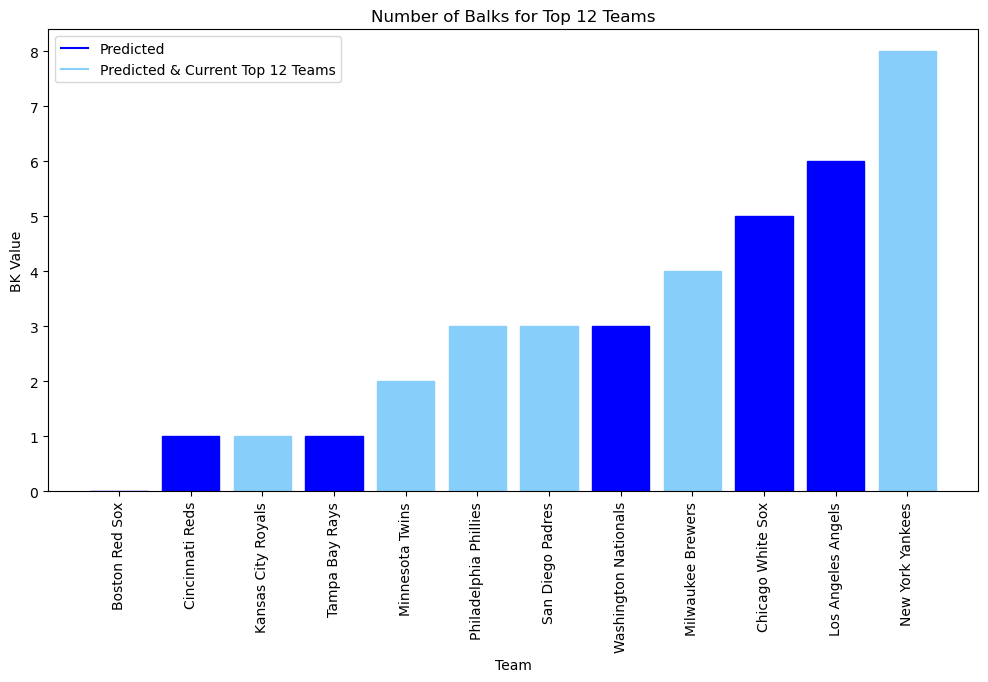

In [20]:
plt.figure(figsize=(12, 6))
bars = plt.bar(BK_sorted_df['Tm'], BK_sorted_df['BK'], color='blue')  
# Change the color to red for specific teams
team_names = ['New York Yankees', 'Milwaukee Brewers', 'Philadelphia Phillies', 'San Diego Padres', 'Kansas City Royals', 'Minnesota Twins']
team_colors = ['lightskyblue' if team in team_names else 'blue' for team in BK_sorted_df['Tm']]
for bar, color in zip(bars, team_colors):
    bar.set_color(color)

# Add legend for the colors
predicted_patch = plt.Line2D([0], [0], color='blue', label='Predicted')
top_teams_patch = plt.Line2D([0], [0], color='lightskyblue', label='Predicted & Current Top 12 Teams')
plt.legend(handles=[predicted_patch, top_teams_patch])

plt.xlabel('Team')
plt.ylabel('BK Value')
plt.title('Number of Balks for Top 12 Teams')
plt.xticks(rotation=90)
plt.show()

In [21]:
#top_12_teams contains the team names of the top 12 teams
top_12_teams_names = [team[0] for team in top_12_teams]

# Filter the df_2024 DataFrame for the top 12 teams and retrieve the "BK" value
SB_values = df_2024[df_2024['Tm'].isin(top_12_teams_names)]['SB']

# Sort the DataFrame by 'BK' values in ascending order
SB_sorted_df = df_2024[df_2024['Tm'].isin(top_12_teams_names)][['Tm', 'SB']].sort_values('SB', ascending=True)
total_SB = SB_values.sum()
# Print the sorted DataFrame
print(SB_sorted_df)
print("Total SB values:", total_SB)

                       Tm  SB
16        Minnesota Twins  34
18       New York Yankees  34
5       Chicago White Sox  42
22       San Diego Padres  56
3          Boston Red Sox  58
12     Los Angeles Angels  59
26         Tampa Bay Rays  63
11     Kansas City Royals  64
20  Philadelphia Phillies  72
15      Milwaukee Brewers  88
6         Cincinnati Reds  96
29   Washington Nationals  98
Total SB values: 764


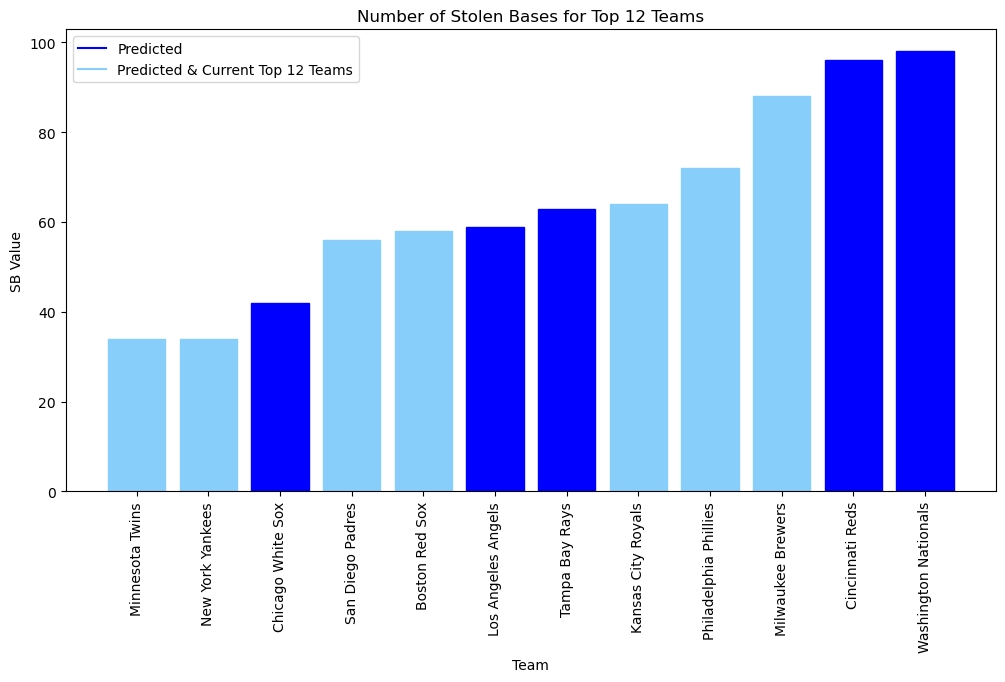

In [22]:
# Create a bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(SB_sorted_df['Tm'], SB_sorted_df['SB'], color='blue')  

# Change the color to lightskyblue for specific teams
team_names = ['New York Yankees', 'Milwaukee Brewers', 'Philadelphia Phillies', 'San Diego Padres', 'Boston Red Sox', 'Minnesota Twins', 'Kansas City Royals']
team_colors = ['lightskyblue' if team in team_names else 'blue' for team in SB_sorted_df['Tm']]
for bar, color in zip(bars, team_colors):
    bar.set_color(color)

# Add legend for the colors
predicted_patch = plt.Line2D([0], [0], color='blue', label='Predicted')
top_teams_patch = plt.Line2D([0], [0], color='lightskyblue', label='Predicted & Current Top 12 Teams')
plt.legend(handles=[predicted_patch, top_teams_patch])
    
plt.xlabel('Team')
plt.ylabel('SB Value')
plt.title('Number of Stolen Bases for Top 12 Teams')
plt.xticks(rotation=90)
plt.show()

In [23]:
#top_12_teams contains the team names of the top 12 teams
top_12_teams_names = [team[0] for team in top_12_teams]

# Filter the df_2024 DataFrame for the top 12 teams and retrieve the "BK" value
CG_y_values = df_2024[df_2024['Tm'].isin(top_12_teams_names)]['CG_y']

# Sort the DataFrame by 'BK' values in ascending order
CG_y_sorted_df = df_2024[df_2024['Tm'].isin(top_12_teams_names)][['Tm', 'CG_y']].sort_values('CG_y', ascending=True)
total_CG_y = CG_y_values.sum()
# Print the sorted DataFrame
print(CG_y_sorted_df)
print("Total CG_y values:", total_CG_y)

                       Tm  CG_y
5       Chicago White Sox     0
6         Cincinnati Reds     0
12     Los Angeles Angels     0
15      Milwaukee Brewers     0
16        Minnesota Twins     0
18       New York Yankees     0
22       San Diego Padres     0
26         Tampa Bay Rays     0
29   Washington Nationals     0
3          Boston Red Sox     1
11     Kansas City Royals     1
20  Philadelphia Phillies     2
Total CG_y values: 4


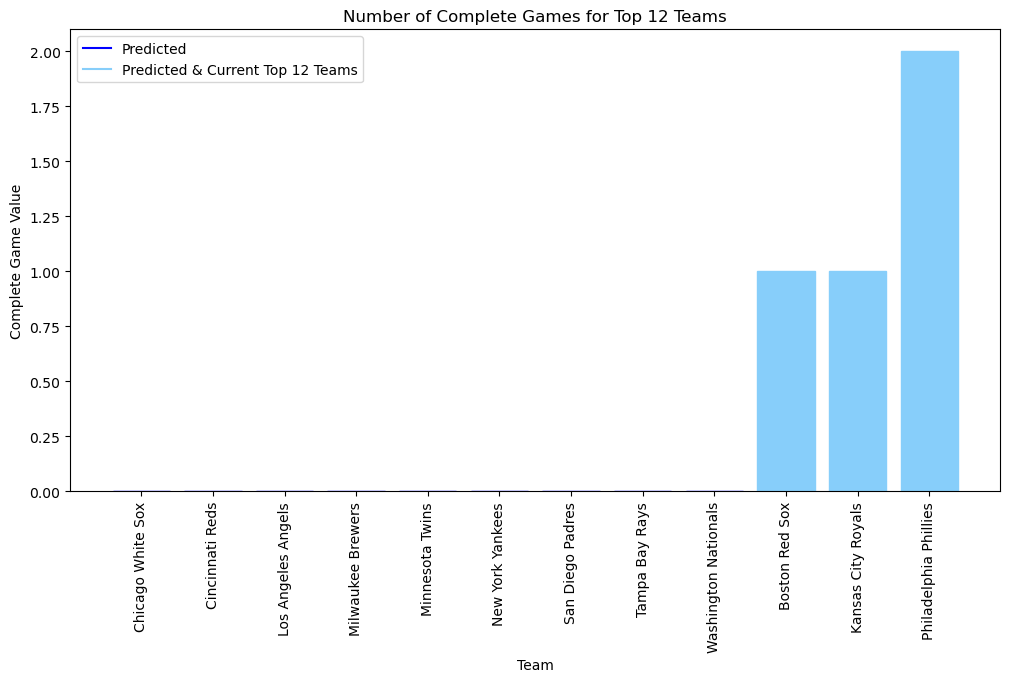

In [31]:
# Create a bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(CG_y_sorted_df['Tm'], CG_y_sorted_df['CG_y'], color='blue')  

# Change the color to lightskyblue for specific teams
team_names = ['Philadelphia Phillies', 'Boston Red Sox', 'Kansas City Royals']
team_colors = ['lightskyblue' if team in team_names else 'blue' for team in CG_y_sorted_df['Tm']]
for bar, color in zip(bars, team_colors):
    bar.set_color(color)

# Add legend for the colors
predicted_patch = plt.Line2D([0], [0], color='blue', label='Predicted')
top_teams_patch = plt.Line2D([0], [0], color='lightskyblue', label='Predicted & Current Top 12 Teams')
plt.legend(handles=[predicted_patch, top_teams_patch])
    
plt.xlabel('Team')
plt.ylabel('Complete Game Value')
plt.title('Number of Complete Games for Top 12 Teams')
plt.xticks(rotation=90)
plt.show()

In [25]:
#top_12_teams contains the team names of the top 12 teams
top_12_teams_names = [team[0] for team in top_12_teams]

# Filter the df_2024 DataFrame for the top 12 teams and retrieve the "Ch" value
Ch_values = df_2024[df_2024['Tm'].isin(top_12_teams_names)]['Ch']

# Sort the DataFrame by 'Ch' values in ascending order
Ch_sorted_df = df_2024[df_2024['Tm'].isin(top_12_teams_names)][['Tm', 'Ch']].sort_values('Ch', ascending=True)
total_Ch = Ch_values.sum()
# Print the sorted DataFrame
print(Ch_sorted_df)
print("Total Ch values:", total_Ch)

                       Tm    Ch
16        Minnesota Twins  2264
6         Cincinnati Reds  2284
5       Chicago White Sox  2315
26         Tampa Bay Rays  2322
12     Los Angeles Angels  2341
15      Milwaukee Brewers  2353
29   Washington Nationals  2358
20  Philadelphia Phillies  2396
11     Kansas City Royals  2398
3          Boston Red Sox  2399
18       New York Yankees  2413
22       San Diego Padres  2453
Total Ch values: 28296


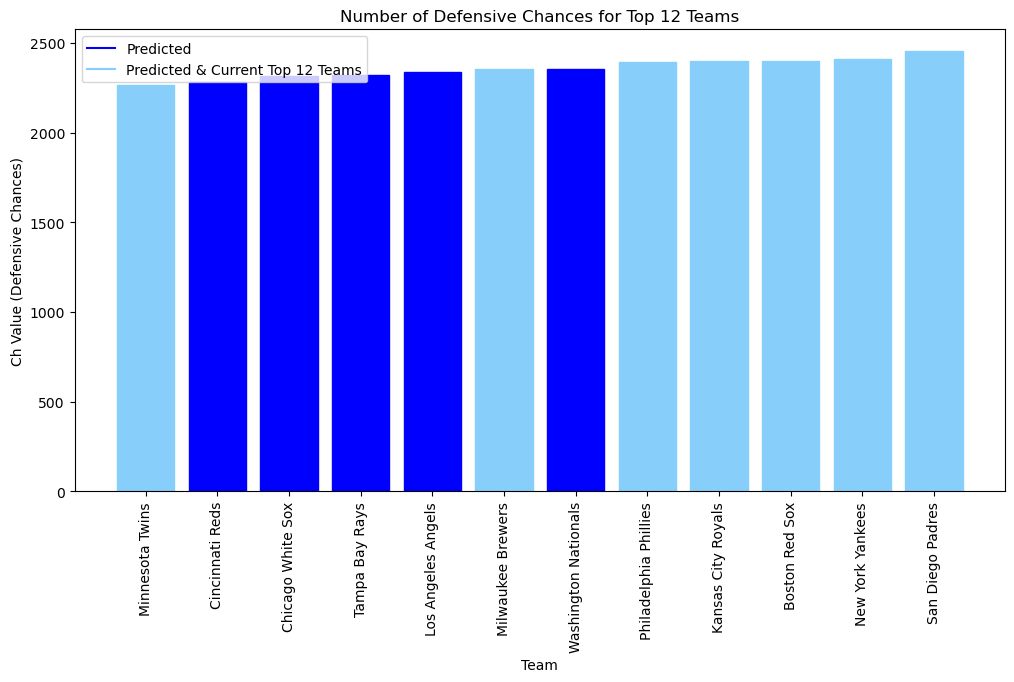

In [32]:
# Create a bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(Ch_sorted_df['Tm'], Ch_sorted_df['Ch'], color='blue')  

# Change the color to lightskyblue for specific teams
team_names = ['Philadelphia Phillies', 'Boston Red Sox', 'Milwaukee Brewers', 'New York Yankees', 'San Diego Padres', 'Minnesota Twins', 'Kansas City Royals']
team_colors = ['lightskyblue' if team in team_names else 'blue' for team in Ch_sorted_df['Tm']]
for bar, color in zip(bars, team_colors):
    bar.set_color(color)

# Add legend for the colors and set it to best fit
predicted_patch = plt.Line2D([0], [0], color='blue', label='Predicted')
top_teams_patch = plt.Line2D([0], [0], color='lightskyblue', label='Predicted & Current Top 12 Teams')
plt.legend(handles=[predicted_patch, top_teams_patch], loc='upper left')

plt.xlabel('Team')
plt.ylabel('Ch Value (Defensive Chances)')
plt.title('Number of Defensive Chances for Top 12 Teams')
plt.xticks(rotation=90)
plt.show()

In [27]:
#top_12_teams contains the team names of the top 12 teams
top_12_teams_names = [team[0] for team in top_12_teams]

# Filter the df_2024 DataFrame for the top 12 teams and retrieve the "GF" value
GF_values = df_2024[df_2024['Tm'].isin(top_12_teams_names)]['GF']

# Sort the DataFrame by 'GF' values in ascending order
GF_sorted_df = df_2024[df_2024['Tm'].isin(top_12_teams_names)][['Tm', 'GF']].sort_values('GF', ascending=True)
total_GF = GF_values.sum()
# Print the sorted DataFrame
print(GF_sorted_df)
print("Total GF values:", total_GF)

                       Tm  GF
20  Philadelphia Phillies  63
3          Boston Red Sox  65
12     Los Angeles Angels  65
29   Washington Nationals  65
6         Cincinnati Reds  66
11     Kansas City Royals  66
15      Milwaukee Brewers  66
16        Minnesota Twins  66
26         Tampa Bay Rays  66
5       Chicago White Sox  67
18       New York Yankees  68
22       San Diego Padres  70
Total GF values: 793


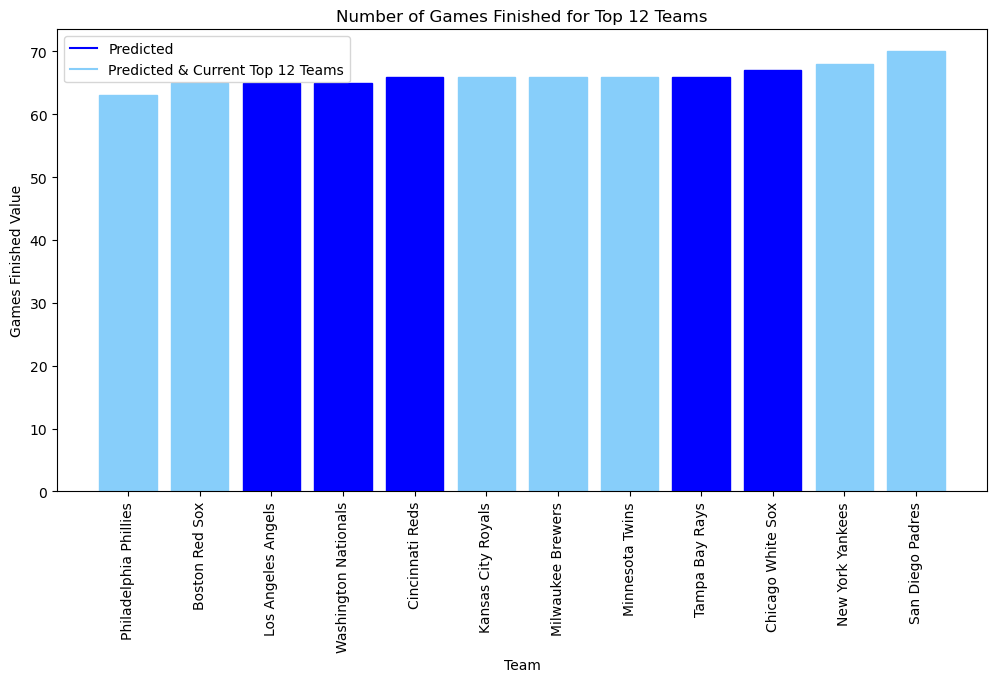

In [33]:
# Create a bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(GF_sorted_df['Tm'], GF_sorted_df['GF'], color='blue')  

# Change the color to lightskyblue for specific teams
team_names = ['Philadelphia Phillies', 'Boston Red Sox', 'Milwaukee Brewers', 'New York Yankees', 'San Diego Padres', 'Kansas City Royals', 'Minnesota Twins']
team_colors = ['lightskyblue' if team in team_names else 'blue' for team in GF_sorted_df['Tm']]
for bar, color in zip(bars, team_colors):
    bar.set_color(color)

# Add legend for the colors
predicted_patch = plt.Line2D([0], [0], color='blue', label='Predicted')
top_teams_patch = plt.Line2D([0], [0], color='lightskyblue', label='Predicted & Current Top 12 Teams')
plt.legend(handles=[predicted_patch, top_teams_patch])
    
plt.xlabel('Team')
plt.ylabel('Games Finished Value')
plt.title('Number of Games Finished for Top 12 Teams')
plt.xticks(rotation=90)
plt.show()

In [29]:
#top_12_teams contains the team names of the top 12 teams
top_12_teams_names = [team[0] for team in top_12_teams]

# Filter the df_2024 DataFrame for the top 12 teams and retrieve the "cSho" value
cSho_values = df_2024[df_2024['Tm'].isin(top_12_teams_names)]['cSho']

# Sort the DataFrame by 'cSho' values in ascending order
cSho_sorted_df = df_2024[df_2024['Tm'].isin(top_12_teams_names)][['Tm', 'cSho']].sort_values('cSho', ascending=True)
total_cSho = cSho_values.sum()
# Print the sorted DataFrame
print(cSho_sorted_df)
print("Total cSho values:", total_cSho)

                       Tm  cSho
5       Chicago White Sox     0
6         Cincinnati Reds     0
11     Kansas City Royals     0
12     Los Angeles Angels     0
15      Milwaukee Brewers     0
16        Minnesota Twins     0
18       New York Yankees     0
22       San Diego Padres     0
26         Tampa Bay Rays     0
29   Washington Nationals     0
3          Boston Red Sox     1
20  Philadelphia Phillies     2
Total cSho values: 3


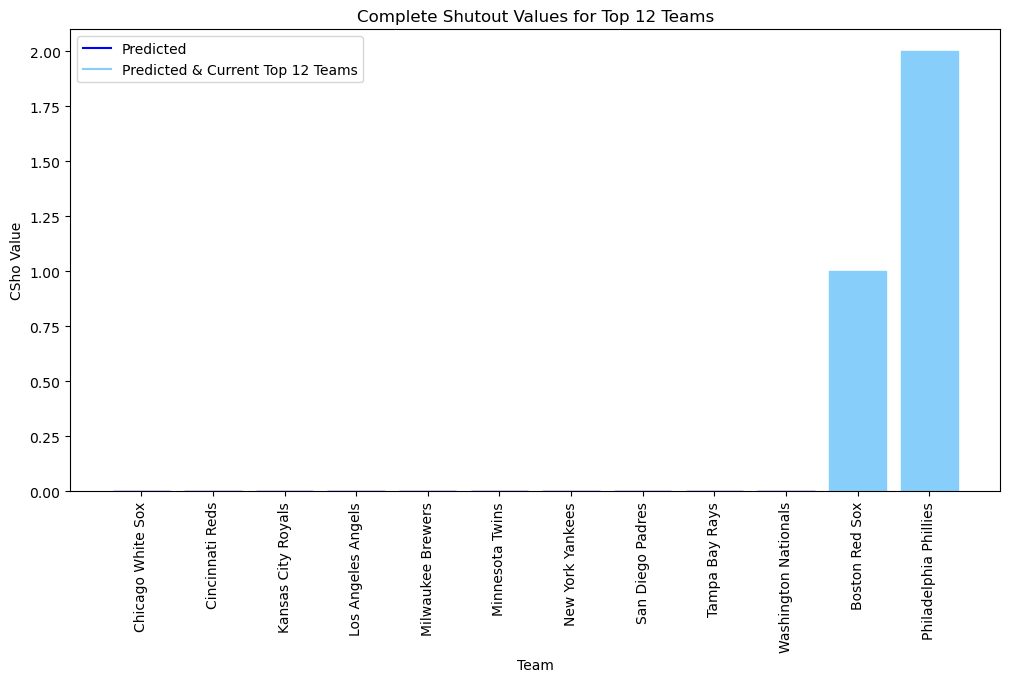

In [30]:
# Create a bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(cSho_sorted_df['Tm'], cSho_sorted_df['cSho'], color='blue')  

# Change the color to lightskyblue for specific teams
team_names = ['Philadelphia Phillies', 'Boston Red Sox']
team_colors = ['lightskyblue' if team in team_names else 'blue' for team in cSho_sorted_df['Tm']]
for bar, color in zip(bars, team_colors):
    bar.set_color(color)

# Add legend for the colors
predicted_patch = plt.Line2D([0], [0], color='blue', label='Predicted')
top_teams_patch = plt.Line2D([0], [0], color='lightskyblue', label='Predicted & Current Top 12 Teams')
plt.legend(handles=[predicted_patch, top_teams_patch])
    
plt.xlabel('Team')
plt.ylabel('CSho Value')
plt.title('Complete Shutout Values for Top 12 Teams')
plt.xticks(rotation=90)
plt.show()